In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

# Dataset characteristics
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {len(data.feature_names)}")
print(f"Feature names: {data.feature_names[:5]}...")  # Show first 5
print(f"Target names: {data.target_names}")



Dataset shape: (569, 30)
Number of features: 30
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Target names: ['malignant' 'benign']


In [3]:
# Cell 3: Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"DataFrame shape: {df.shape}")
print(f"DataFrame info:")
print(df.info())

# Cell 4: Class distribution analysis
print("Class distribution:")
print(f"Benign (1): {np.sum(y == 1)} samples ({np.sum(y == 1)/len(y)*100:.1f}%)")
print(f"Malignant (0): {np.sum(y == 0)} samples ({np.sum(y == 0)/len(y)*100:.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = np.sum(y == 1) / np.sum(y == 0)
print(f"Imbalance ratio (Benign:Malignant): {imbalance_ratio:.2f}:1")

DataFrame shape: (569, 31)
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null

In [4]:
# Cell 4: Class distribution analysis
print("Class distribution:")
print(f"Benign (1): {np.sum(y == 1)} samples ({np.sum(y == 1)/len(y)*100:.1f}%)")
print(f"Malignant (0): {np.sum(y == 0)} samples ({np.sum(y == 0)/len(y)*100:.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = np.sum(y == 1) / np.sum(y == 0)
print(f"Imbalance ratio (Benign:Malignant): {imbalance_ratio:.2f}:1")

Class distribution:
Benign (1): 357 samples (62.7%)
Malignant (0): 212 samples (37.3%)
Imbalance ratio (Benign:Malignant): 1.68:1


In [5]:
# Cell 5: Statistical summary
print("Statistical Summary of Features:")
print(df.describe())

Statistical Summary of Features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000 

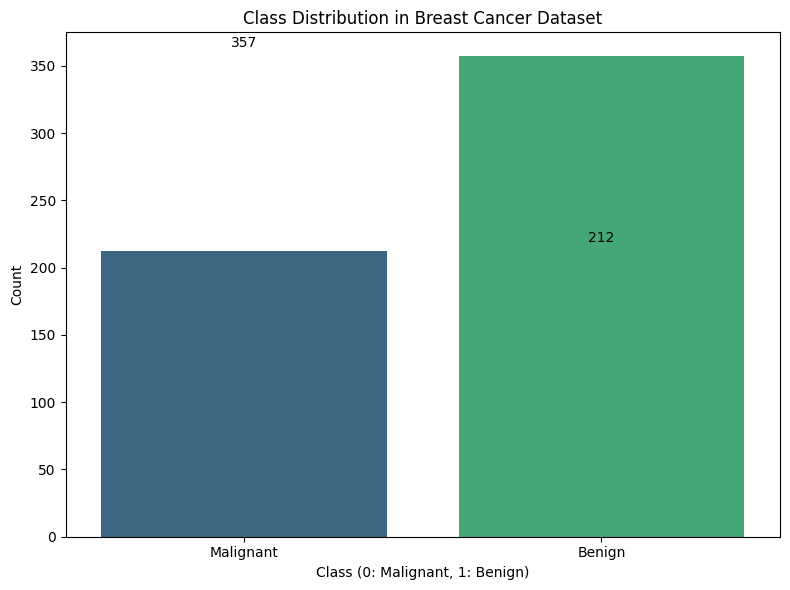

In [6]:
import os

plt.figure(figsize=(8, 6))
counts = df['target'].value_counts()
sns.countplot(data=df, x='target', palette='viridis')
plt.title('Class Distribution in Breast Cancer Dataset')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])

# Add count labels on bars
for i, count in enumerate(counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
os.makedirs('../../reports/figures', exist_ok=True)  # <<- Add this!
plt.savefig('../../reports/figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


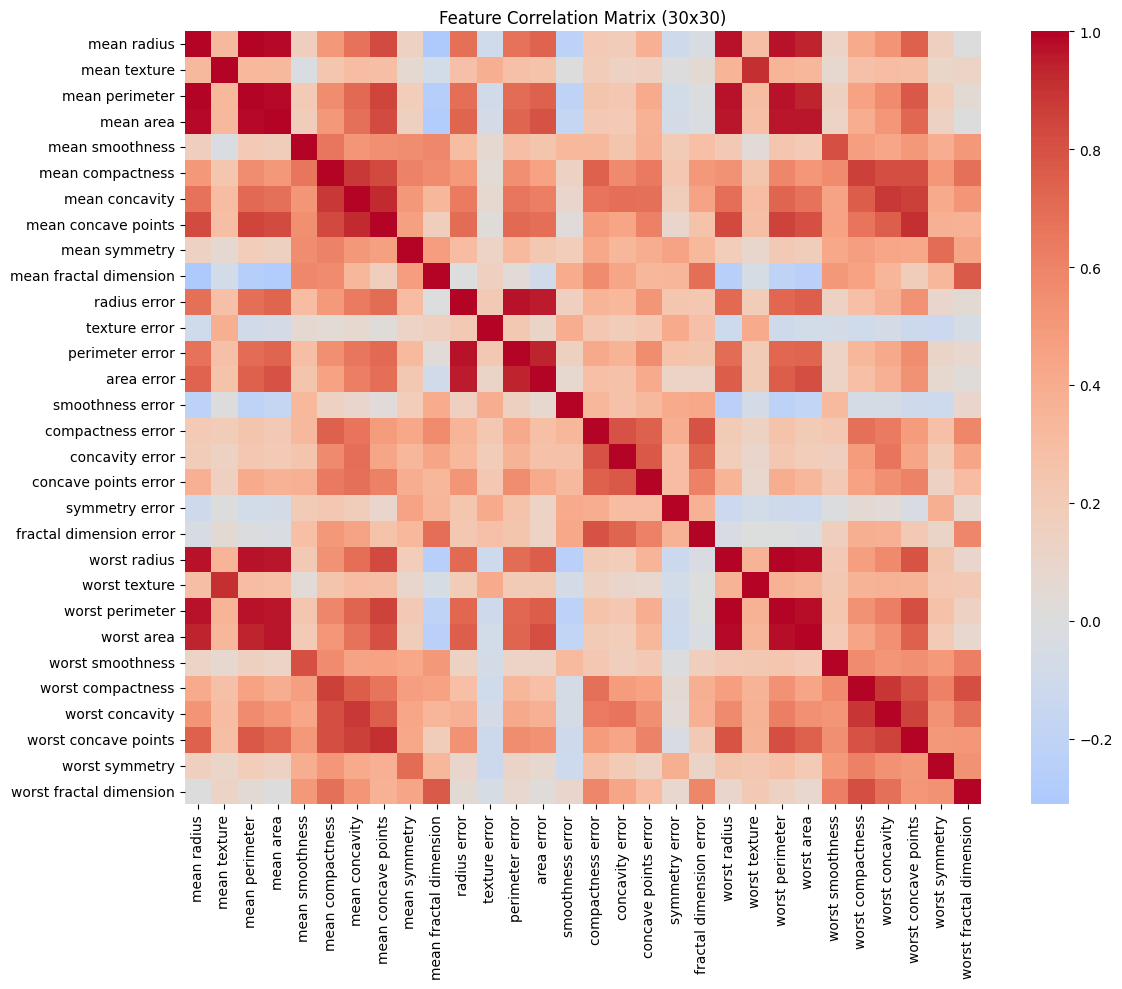

In [7]:
# Cell 7: Feature correlation analysis 
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (30x30)')
plt.tight_layout()
plt.savefig('../../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

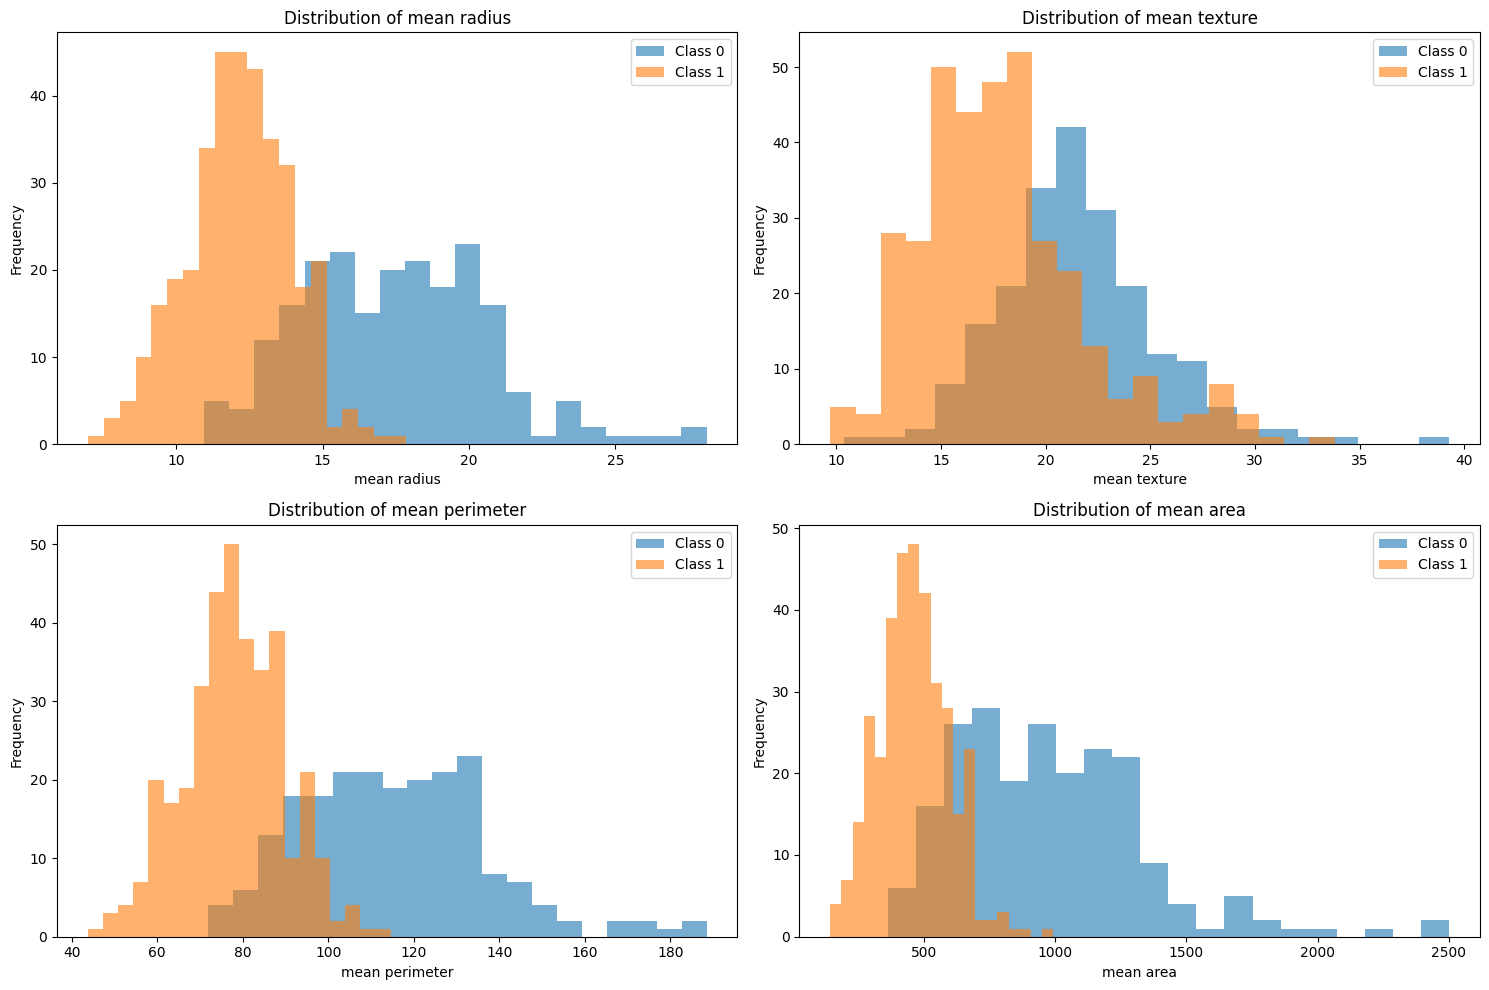

In [8]:
# Cell 8: Feature distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot distributions of first few features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for i, feature in enumerate(features_to_plot):
    ax = axes[i//2, i%2]
    for target_class in [0, 1]:
        data_subset = df[df['target'] == target_class][feature]
        ax.hist(data_subset, alpha=0.6, label=f'Class {target_class}', bins=20)
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../../reports/figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Cell 9: Train-test split with stratification
from sklearn.model_selection import train_test_split

# Stratified split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Critical: maintains original class distribution
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Verify class distributions are maintained
print("\nClass distribution in training set:")
train_counts = np.bincount(y_train)
print(f"Malignant (0): {train_counts[0]} ({train_counts[0]/len(y_train)*100:.1f}%)")
print(f"Benign (1): {train_counts[1]} ({train_counts[1]/len(y_train)*100:.1f}%)")

print("\nClass distribution in test set:")
test_counts = np.bincount(y_test)
print(f"Malignant (0): {test_counts[0]} ({test_counts[0]/len(y_test)*100:.1f}%)")
print(f"Benign (1): {test_counts[1]} ({test_counts[1]/len(y_test)*100:.1f}%)")

Training set size: 455 samples
Test set size: 114 samples
Feature dimensions: 30

Class distribution in training set:
Malignant (0): 170 (37.4%)
Benign (1): 285 (62.6%)

Class distribution in test set:
Malignant (0): 42 (36.8%)
Benign (1): 72 (63.2%)


In [10]:
# Cell 10: Feature scaling (CRITICAL: fit only on training data)
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Show original feature ranges
print("Original feature ranges (first 5 features):")
for i in range(5):
    feature_name = data.feature_names[i]
    print(f"{feature_name}: [{X_train[:, i].min():.2f}, {X_train[:, i].max():.2f}]")

# Fit scaler on training data ONLY
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaling parameters

print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

# Show scaled feature ranges
print("\nScaled feature ranges (first 5 features):")
for i in range(5):
    feature_name = data.feature_names[i]
    print(f"{feature_name}: [{X_train_scaled[:, i].min():.2f}, {X_train_scaled[:, i].max():.2f}]")

# Verify scaling properties
print(f"\nScaling verification (first feature):")
print(f"Mean: {X_train_scaled[:, 0].mean():.6f} (should be ≈ 0)")
print(f"Std: {X_train_scaled[:, 0].std():.6f} (should be ≈ 1)")

Original feature ranges (first 5 features):
mean radius: [6.98, 28.11]
mean texture: [9.71, 39.28]
mean perimeter: [43.79, 188.50]
mean area: [143.50, 2499.00]
mean smoothness: [0.06, 0.14]

Scaled training data shape: (455, 30)
Scaled test data shape: (114, 30)

Scaled feature ranges (first 5 features):
mean radius: [-2.03, 4.02]
mean texture: [-2.17, 4.55]
mean perimeter: [-1.98, 4.02]
mean area: [-1.47, 5.37]
mean smoothness: [-2.50, 3.61]

Scaling verification (first feature):
Mean: -0.000000 (should be ≈ 0)
Std: 1.000000 (should be ≈ 1)


In [11]:
import os
os.makedirs('../../data/processed', exist_ok=True)

# Save processed data
np.save('../../data/processed/X_train_scaled.npy', X_train_scaled)
np.save('../../data/processed/X_test_scaled.npy', X_test_scaled)
np.save('../../data/processed/y_train.npy', y_train)
np.save('../../data/processed/y_test.npy', y_test)

print("Processed data saved to data/processed/")

Processed data saved to data/processed/
